In [22]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Building classification models

In this tutorial, we will build several classification models and compare their performance.

<div class="alert alert-info">Step 1: Read the dataset.</div>

In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/gnapoles/data-mining-course/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<div class="alert alert-info">Step 2: Splitting the dataset and pre-processing.</div>

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

KeyError: "['Outcome'] not found in axis"

In [42]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)  # Use the same scaler as on the training data
X_test.shape

(150, 2)

<div class="alert alert-info">Step 3: Training different classifiers.</div>

### Zero rule

In [27]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
dummy = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_pred = dummy.predict(X_test)
dummy_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



<div class="alert alert-warning">Exercise 1: Given the classification report of the zero-rule method, how many positive instances(target=1) are present in the test set?</div>

### Naive-Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb = GaussianNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



### K-nearest Neighbors

In [29]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



### Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       100
           1       0.61      0.43      0.50        54

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.64       154
weighted avg       0.69      0.70      0.69       154



### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       100
           1       0.77      0.63      0.69        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



<div class="alert alert-info">Step 4: Comparing their performance.</div>

### Barplot summarization

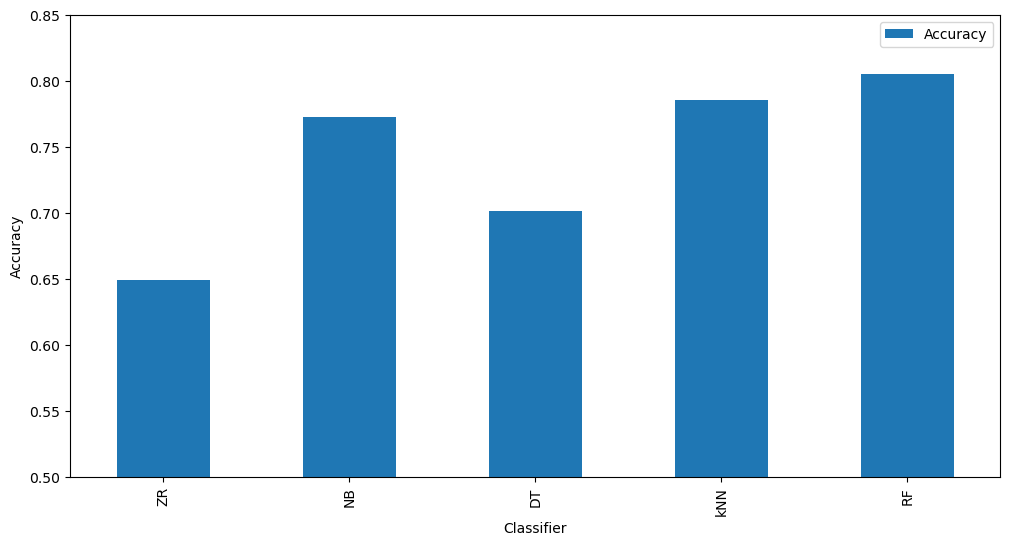

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define data
data = {'Classifier': ['ZR', 'NB', 'DT', 'kNN', 'RF'],
        'Accuracy': [dummy_acc, nb_acc, dt_acc, knn_acc, rf_acc]}

# Create and plot DataFrame
pd.DataFrame(data).plot(kind='bar', x='Classifier', y='Accuracy', ylim=(0.50, 0.85),figsize=(12, 6))

# Label axes
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.show()


<div class="alert alert-warning">Exercise 2: Given the plot, which classification method has the lowest accuracy?</div>

<div class="alert alert-warning">Exercise 3: Which of the following snippets will aim to read the dataset “student_exam_data.csv” and split it into 70% training set and 30% test set?</div>

In [33]:
#c)
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('student_exam_data.csv')
df.head()
X = df.drop(columns=["Pass/Fail"])
y = df["Pass/Fail"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

<div class="alert alert-warning">Exercise 4: Which of the following snippets will assist you to map features values to the range of[0,1]?</div>

In [34]:
#a)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div class="alert alert-warning">Exercise 5: As a data scientist, you are tasked to train a dummy classifier on the dataset and evaluate its performance. Which of the following snippets will assist you in achieving this goal?</div>

In [35]:
#a)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
dummy = DummyClassifier(strategy="most_frequent").fit(X_train_scaled, y_train)
y_pred = dummy.predict(X_test_scaled)
dummy_acc_student= accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        95
           1       0.00      0.00      0.00        55

    accuracy                           0.63       150
   macro avg       0.32      0.50      0.39       150
weighted avg       0.40      0.63      0.49       150



<div class="alert alert-warning">Exercise 6: Your next task is to train a random forest including 10 tree on the dataset and evaluate its performance. Which of the following snippets will assist you in achieving this goal?</div>

In [36]:
#b)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier(random_state=0,n_estimators=10).fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

rf_acc_student= accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        55

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



<div class="alert alert-info">Now, it is time to compare their performance</div>

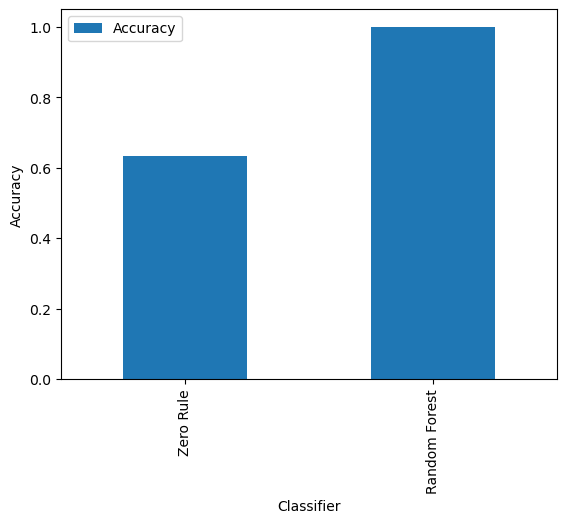

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Define data
data = {'Classifier': ['Zero Rule', 'Random Forest'],
        'Accuracy': [dummy_acc_student, rf_acc_student]}

# Create and plot DataFrame
pd.DataFrame(data).plot(kind='bar', x='Classifier', y='Accuracy')

# Label axes
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.show()


### Visualizing the decision boundaries (Self-Study)

In [38]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [39]:
def visualize_decision_boundaries(feature1, feature2):
  
    import matplotlib.pyplot as plt
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.gridspec as gridspec
    import itertools

    model0 = DummyClassifier(strategy="most_frequent")
    model1 = GaussianNB()
    model2 = DecisionTreeClassifier(random_state=0)
    model3 = RandomForestClassifier(random_state=0)
    model4 = KNeighborsClassifier(n_neighbors=3)


    gs = gridspec.GridSpec(2,3)
    fig = plt.figure(figsize=(16,8))

    labels = ['Zero Rule', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
              'k-Nearest Neighbors']
    for clf, lab, grd in zip([model0, model1, model2, model3, model4],
                             labels, itertools.product([0, 1, 2], repeat=2)):

        clf.fit(X_train[:, [feature1, feature2]], y_train)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X_test[:, [feature1, feature2]], y=y_test.values, clf=clf, legend=2)
        plt.title(lab)

    plt.show()


In [40]:
visualize_decision_boundaries(2,3)

InvalidIndexError: (slice(None, None, None), [2, 3])

<Figure size 1600x800 with 0 Axes>

In [ ]:
visualize_decision_boundaries(1, 5)

InvalidIndexError: (slice(None, None, None), [1, 5])

<Figure size 1600x800 with 0 Axes>